In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#Set-up
results_path=os.path.join(os.getcwd(),"Results")
exp_type="Par_Comb_"

cols=["Eff_2","Fit_var"]
metric_list=["Av_Best","Eff_1"]
dir_folder=results_path

Parameters=["ELITIST","PR_CROSS","PR_MUT"]
criteria="CritSum"


In [ ]:
class_name_list=[name for name in os.listdir(dir_folder) if exp_type in name]
#create class_list (as dict)
class_dict={}

for class_name in class_name_list:
    class_dict[class_name] = table_class(class_name,results_path,exp_type,cols,metric_list)

In [3]:
df_dict=table_pipeline(class_dict)

In [4]:
def_table=pd.concat(df_dict.values())

In [5]:
def_table.head()

,NIND,ELITIST,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Eff_1,Av_Best_unit,Eff_1_unit,Dataset,CritSum
0,50,0.038828,0.616244,0.491588,3.603519,3.358978,0.019512,0.599117,0.219725,rondrit016,0.409421
1,50,0.038828,0.616244,0.299385,3.555620,3.408639,0.019736,0.695685,0.386019,rondrit016,0.540852
2,50,0.038828,0.616244,0.047393,3.546992,3.421577,0.019758,0.713079,0.402138,rondrit016,0.557608
3,50,0.038828,0.616244,0.336340,3.547857,3.486077,0.019564,0.711336,0.258643,rondrit016,0.484989
4,50,0.038828,0.616244,0.244620,3.615450,3.433619,0.019642,0.575063,0.316067,rondrit016,0.445565


In [6]:
rank_table=rank_tables(df_dict,Parameters)

In [9]:
rank_table.head()

,ELITIST,PR_CROSS,PR_MUT,CritSum
382,0.139749,0.565568,0.338008,3.281753
254,0.139749,0.630520,0.189580,3.268534
836,0.135933,0.565568,0.189437,3.265649


In [11]:
table_path=os.path.join(results_path,"Ap1_rank_table.csv")
rank_table.to_csv(table_path)

# Plotting

In [ ]:
sns.relplot(x="PR_CROSS", y="Av_Best_unit", hue="Dataset",col="Dataset" ,data=def_table);


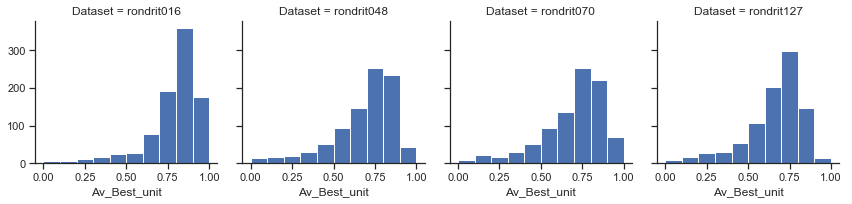

In [17]:
sns.set(style="ticks")

g = sns.FacetGrid(def_table, col="Dataset")
g.map(plt.hist, "Av_Best_unit");


C:\Users\jeuux\Anaconda2\envs\CVision\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


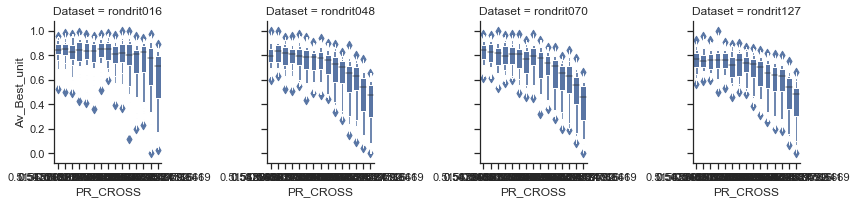

In [24]:
sns.set(style="ticks")

g = sns.FacetGrid(def_table, col="Dataset")
g.map(sns.boxenplot, "PR_CROSS", "Av_Best_unit")

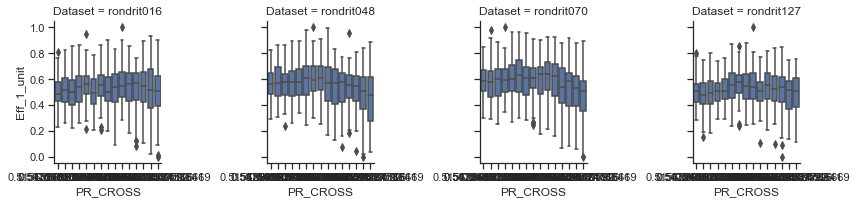

In [20]:
sns.set(style="ticks")

g = sns.FacetGrid(def_table, col="Dataset")
g.map(sns.boxplot, "PR_CROSS", "Eff_1_unit")

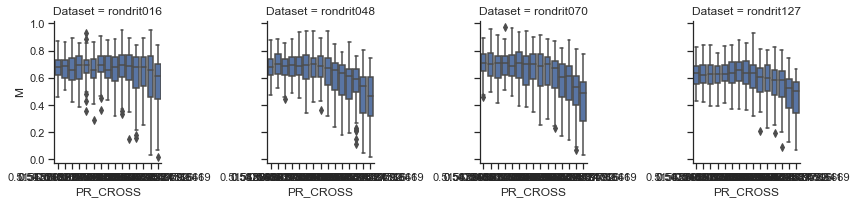

In [26]:
sns.set(style="ticks")

g = sns.FacetGrid(def_table, col="Dataset")
g.map(sns.boxplot, "PR_CROSS", "M")

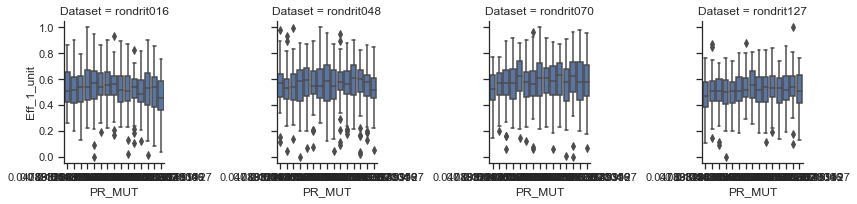

In [21]:
sns.set(style="ticks")

g = sns.FacetGrid(def_table, col="Dataset")
g.map(sns.boxplot, "PR_MUT", "Eff_1_unit")

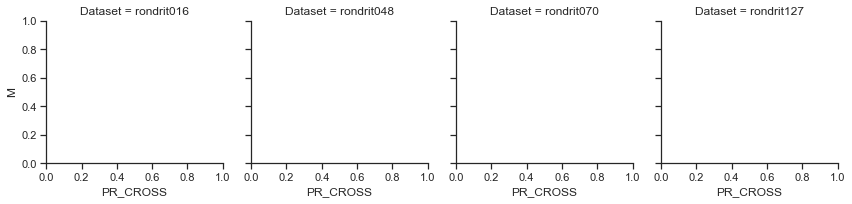

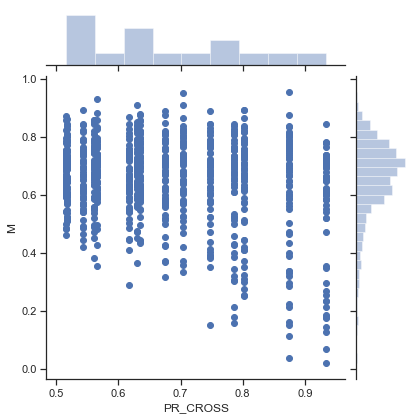

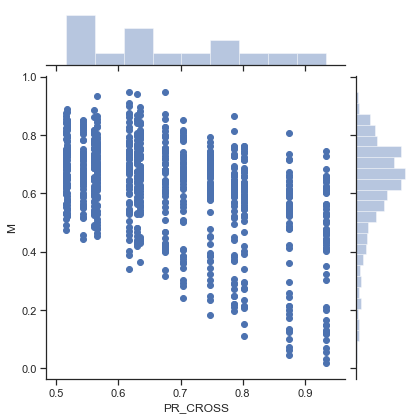

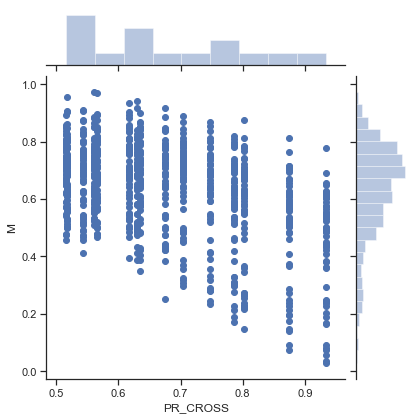

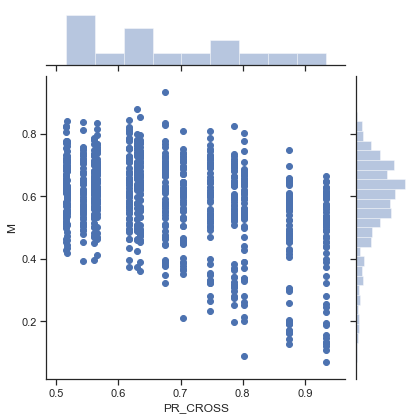

In [28]:
sns.set(style="ticks")

g = sns.FacetGrid(def_table, col="Dataset")
g.map(sns.jointplot, "PR_CROSS", "M")

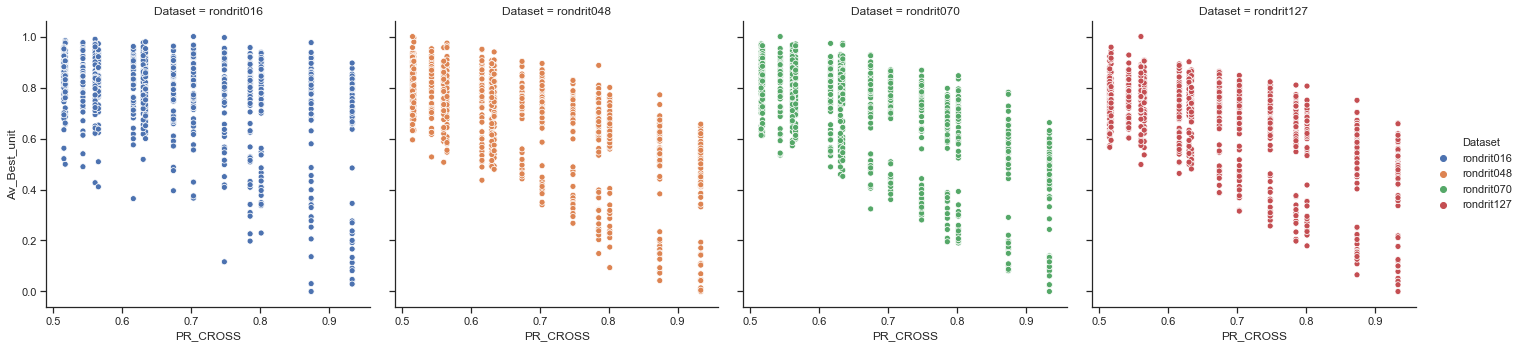

In [30]:
sns.relplot(x="PR_CROSS", y="Av_Best_unit", hue="Dataset",col="Dataset" ,data=def_table);


In [ ]:
sns.relplot(x="ELITIST", y="Av_Best_unit", hue="Dataset",col="Dataset" ,data=def_table);


In [ ]:
for key in finegrained_dict.keys():
    sns.jointplot(x="PR_CROSS", y="Av_Best",data=finegrained_dict[key]);

In [ ]:
sns.catplot(x="PR_CROSS", y="Av_Best", kind="box", data=df_test);


In [ ]:
# def_table=def_table.drop(columns="NIND")
# sns.pairplot(def_table,hue="Dataset");
sns.catplot(x="PR_CROSS", y="Av_Best", hue="Dataset", kind="box", data=def_table);
